<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-2/blob/main/5.a.%20AutoEncoder%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

شبکه های عصبی خودرمزگذار AutoEncoder:

تصور کن می‌خوای یه عکس بزرگ رو به دوستت بفرستی، اما اینترنتت خیلی ضعیفه.
کاری که می‌کنی اینه:

عکس رو کوچیک و فشرده می‌کنی (مثلاً به یه نسخه خلاصه تبدیلش می‌کنی).

وقتی دوستت عکس رو گرفت، اون رو دوباره بزرگ و بازسازی می‌کنه.

🔹 در Autoencoder هم همین اتفاق میفته:

Encoder (رمزگذار): داده‌ی اصلی رو می‌گیره و اون رو فشرده و خلاصه می‌کنه (مثل کوچک کردن عکس).

Code (کُد/ویژگی‌های مهم): همون نسخه‌ی خلاصه و کوچیک از داده است.

Decoder (رمزگشا): از روی اون نسخه‌ی خلاصه دوباره داده‌ی اصلی رو بازسازی می‌کنه (مثل بزرگ کردن دوباره‌ی عکس).

📌 نکته مهم:

Autoencoder یاد می‌گیره اطلاعات مهم داده رو نگه داره و چیزهای بی‌اهمیت رو حذف کنه.

کاربردهاش: فشرده‌سازی داده، حذف نویز از عکس/صدا، پیدا کردن الگوهای پنهان.

🎨 مثال:
فرض کن می‌خوای یه خونه رو برای دوستت توضیح بدی.

به جای اینکه بگی "خونه ۴ تا پنجره داره، درش آبیه، سقف قرمزه..." فقط می‌گی: "یه خونه‌ی ساده با در آبی."

این میشه Encoder.

بعد دوستت با همین توضیح ساده، توی ذهنش دوباره خونه رو تصور می‌کنه.

این میشه Decoder.

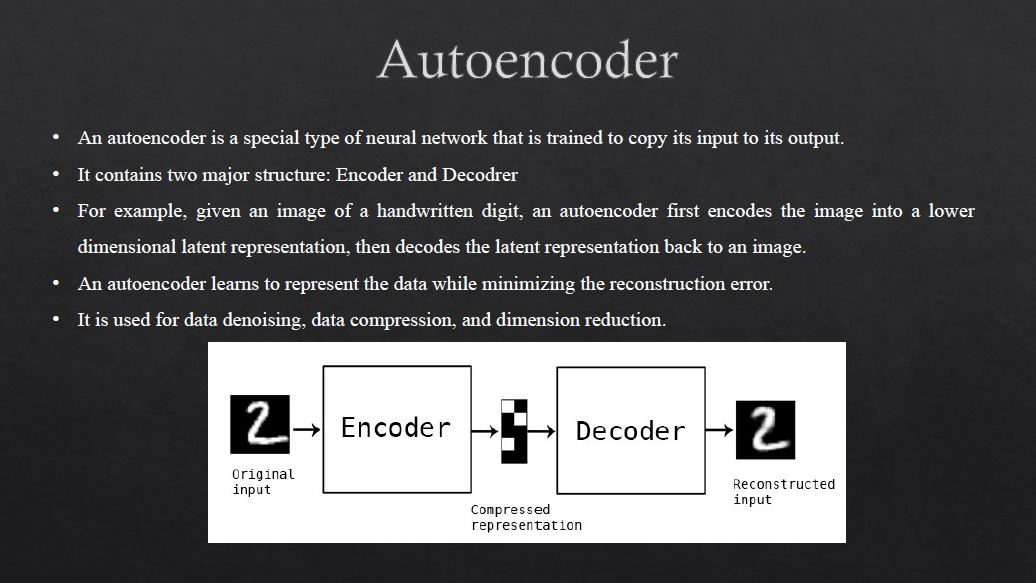

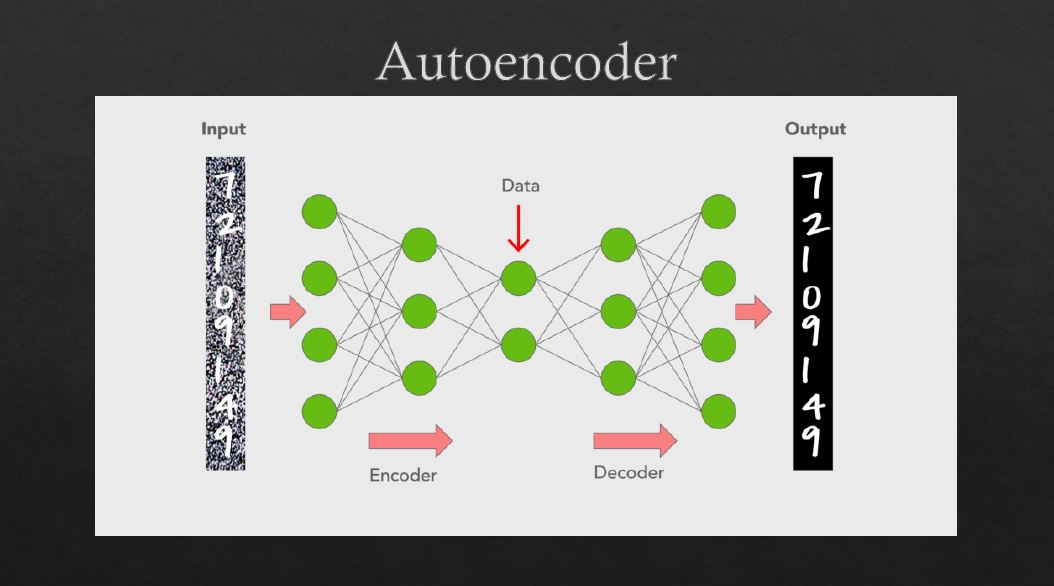

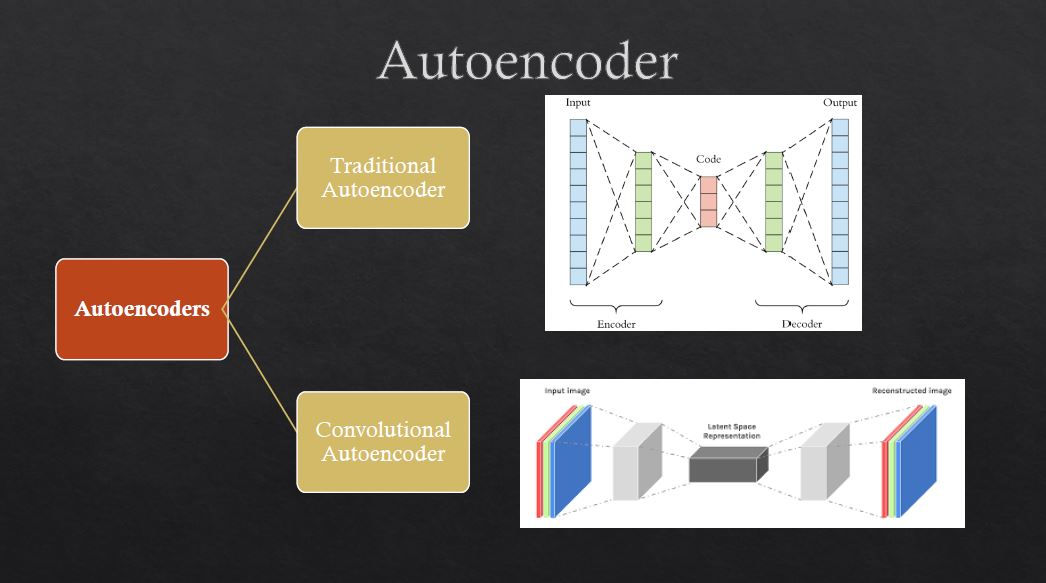

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1102
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0382
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0273
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0219
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0182
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0158
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0140
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0128
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0120
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0115
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


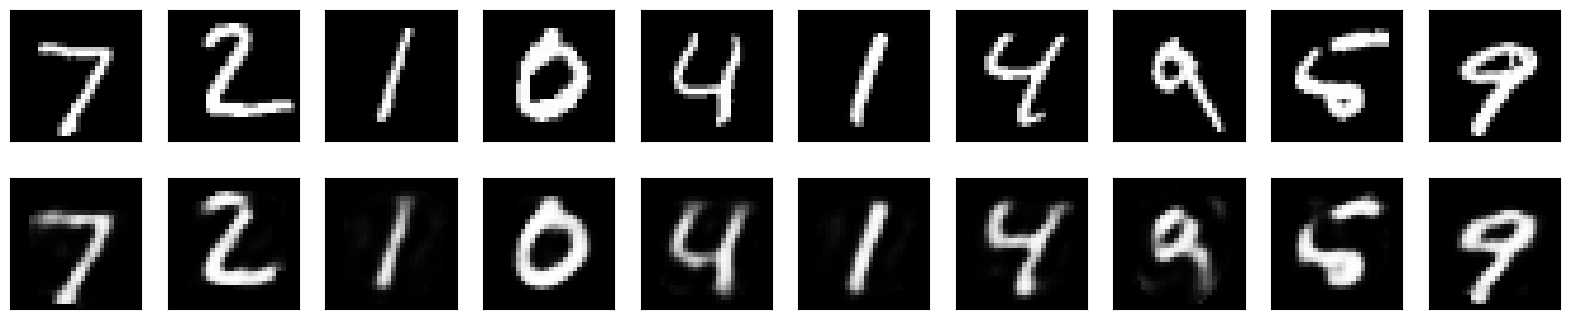

In [3]:
from keras.layers import Dense                 # لایه کاملاً متصل
from keras.models import Sequential            # ساخت مدل ترتیبی
from keras.datasets import mnist               # دیتاست اعداد دست‌نویس MNIST
from keras.optimizers import Adam              # بهینه‌ساز Adam
import matplotlib.pyplot as plt                # رسم نمودار و تصاویر
import numpy                                   # کار با آرایه‌ها

# بارگذاری دیتاست MNIST، فقط تصاویر (برچسب‌ها نیاز نیست)
(X_train, _), (X_test, _) = mnist.load_data()

# تغییر شکل تصاویر به بردار 784 بعدی (28*28)
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

# تبدیل داده‌ها به نوع float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# نرمال‌سازی داده‌ها بین 0 و 1
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

# ساخت مدل Autoencoder ساده
Model = Sequential()
Model.add(Dense(32, activation='relu', input_dim=784))  # لایه رمزگذار: کاهش ابعاد به 32 نرون
Model.add(Dense(784, activation='sigmoid'))             # لایه دیکودر: بازسازی تصویر اصلی

Model.summary()  # نمایش معماری مدل

# کامپایل مدل با Adam و تابع خطای میانگین مربعات (MSE)
Model.compile(optimizer=Adam(), loss='mse')

# آموزش مدل Autoencoder: ورودی = خروجی
Model.fit(X_train, X_train, epochs=10, batch_size=256)

# پیش‌بینی تصاویر بازسازی شده روی داده‌های تست
Decoded_images = Model.predict(X_test)

# نمایش چند تصویر اصلی و بازسازی شده
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # تصویر اصلی
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i, :].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])

    # تصویر بازسازی شده
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(Decoded_images[i, :].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
plt.show()


<div dir="rtl" align="right">

🔹 توضیح:

مدل Autoencoder ساخته شده تا تصاویر MNIST را فشرده و دوباره بازسازی کند.

لایه اول (Dense(32)) تصویر را به یک بردار 32 بعدی فشرده می‌کند (رمزگذاری).

لایه دوم (Dense(784)) بردار فشرده را به تصویر اصلی بازمی‌گرداند (رمزگشایی).

آموزش با MSE انجام می‌شود چون هدف کم کردن اختلاف تصویر اصلی و بازسازی شده است.

در انتها، تصاویر اصلی و بازسازی شده را کنار هم رسم می‌کنیم تا کیفیت بازسازی را ببینیم.